# PREPARACION DE DATOS / PREPROCESAMIENTO

## 1. Importación de Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sweetviz
import sweetviz as sv

### Cargando los datos

In [5]:
df = pd.read_csv("C:/Users/aprats/OneDrive - Fundacio privada quiropractica/VARIOS/AP Personal/ML/bank_dataset.CSV")

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


##### Sobre el Data Set
###### Age: La edad del cliente
###### Job: situación laboral o puesto de trabajo que ocupa
###### Marital: Estado civil del cliente
###### Education: Nivel de education que tiene el cliente
###### Default:
###### Balance: Capacidad económica del cliente
###### Housing: Si tiene propidad o no
###### Loan: Si tiene prestamos
###### Contact: Como fue contactado el cliente
###### Day: cantidad de dias que fueron llamados
###### Month: Mes del año que fue contactado
###### Duraction: duración de la llamada telefonica
###### Campaign: En que campaña fue contactado
###### Previous:
###### Deposit: el resultado de la campañana, Si invirtió o no


#### EDA

##### La escala de los valores númerico s son diferentes, hay una 4 variable objetivo, no hay variables suceptibles 
##### Hay variables con valores nulos (age, marital, education)

In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### VALORES NULOS

##### Visualización de valores nulos

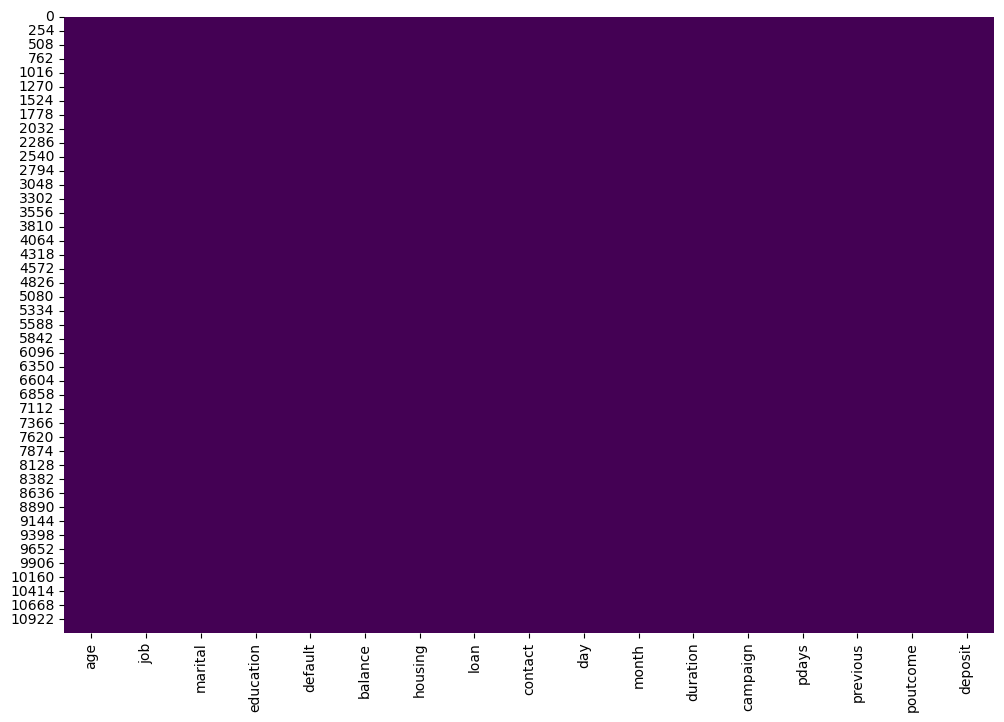

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show() 
df.isnull().sum()


# Dividir el conjunto de datos

### División de los datos de la siguiente proporción: 80% entrenamiento, 20% prueba (esto se ve reflejado en el dato test_size=0.2)

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['deposit'])
y = df['deposit'] 

train_set, test_set, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [17]:
print(f"Conjunto de entrenamiento: {train_set.shape[0]} muestras")
print(f"Conjunto de prueba: {test_set.shape[0]} muestras")
print(f"Total de muestras: {train_set.shape[0] + test_set.shape[0]}")


Conjunto de entrenamiento: 8929 muestras
Conjunto de prueba: 2233 muestras
Total de muestras: 11162


# Detección Outliers

#### Seleccionamos las columnas numéricas

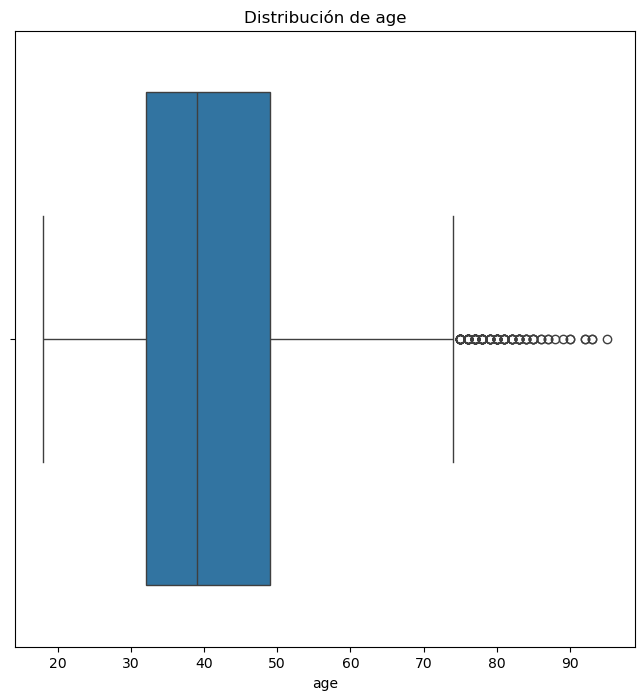

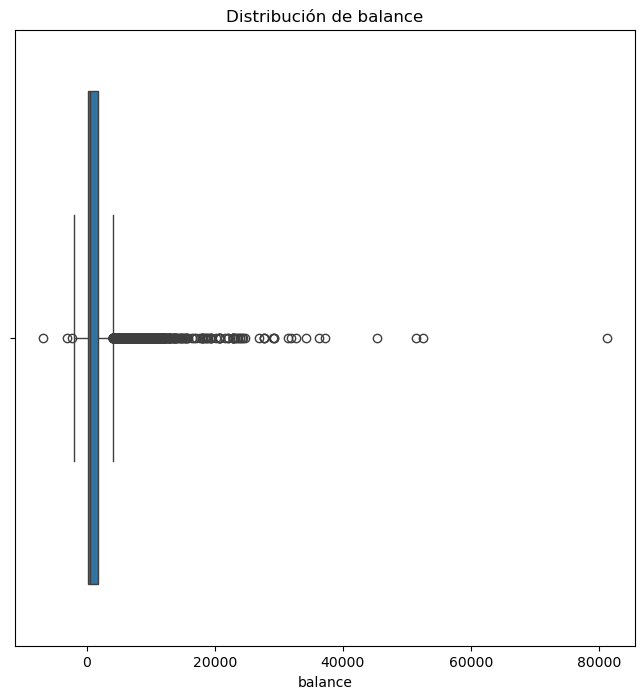

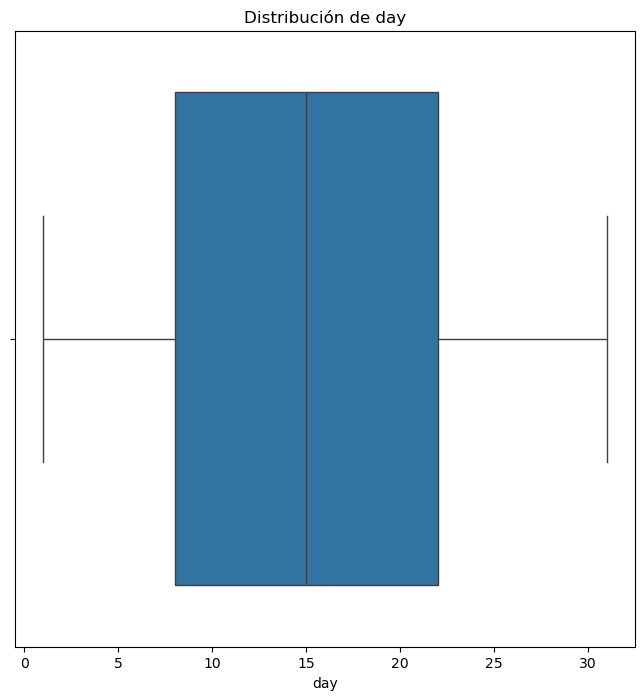

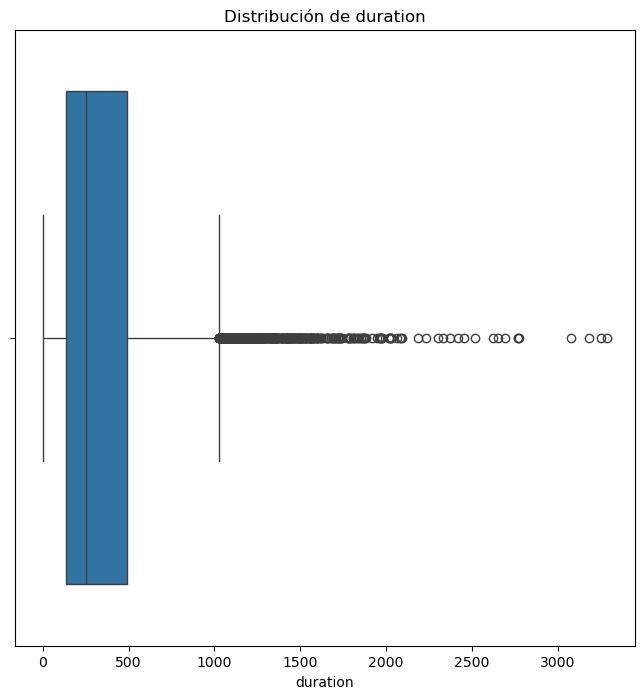

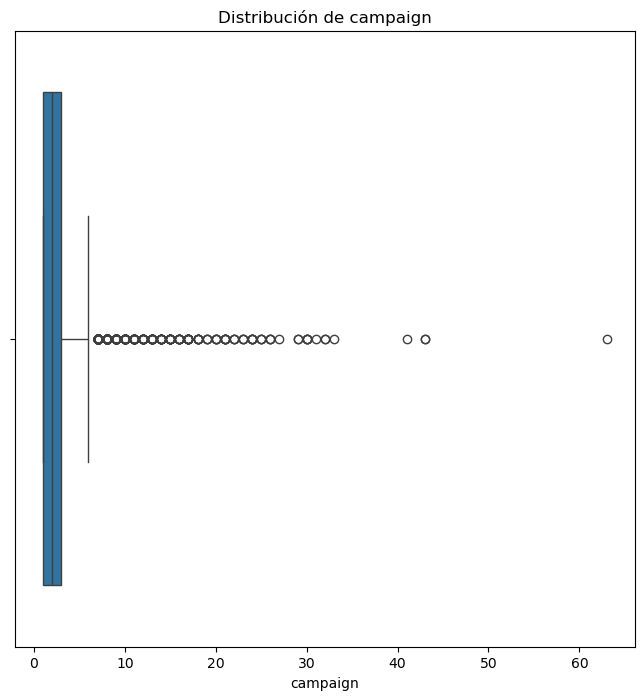

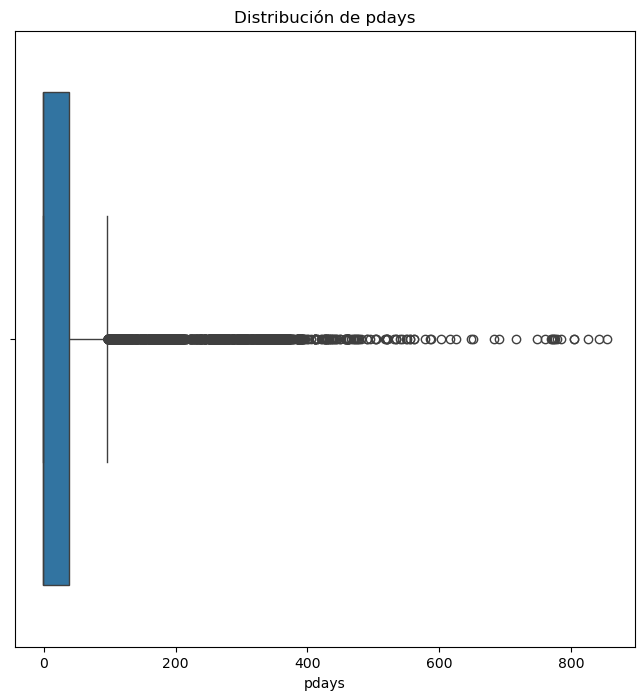

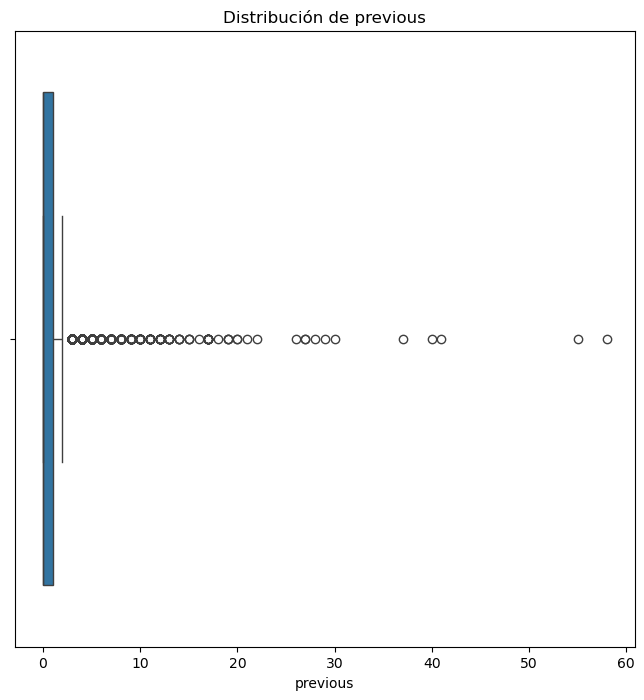

In [20]:
numerical_columns =train_set.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 8))
    sns.boxplot(data=train_set, x=col)
    plt.title(f'Distribución de {col}')
    plt.show()


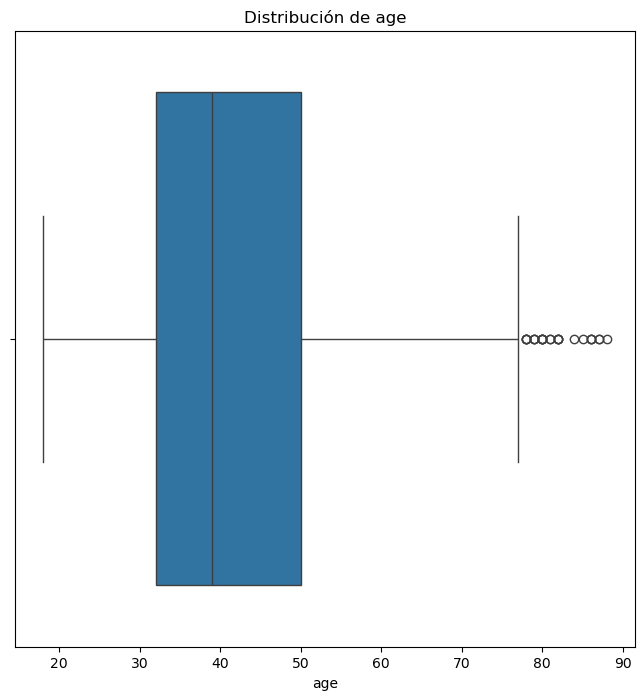

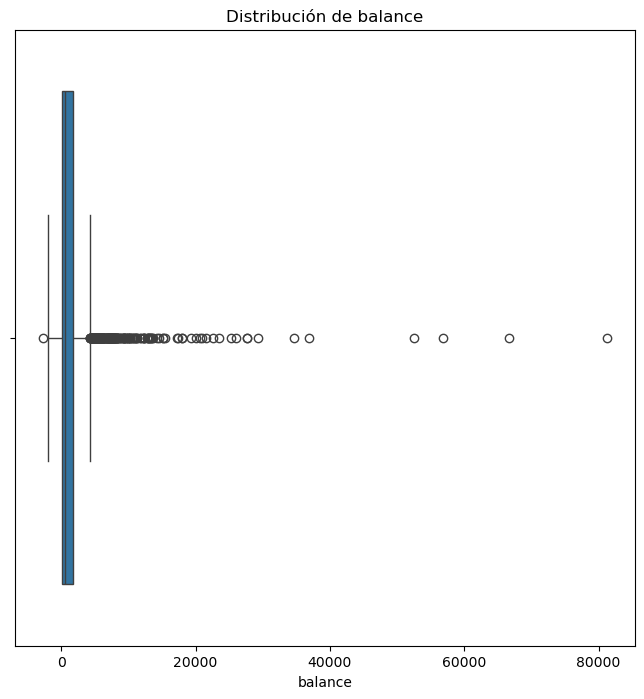

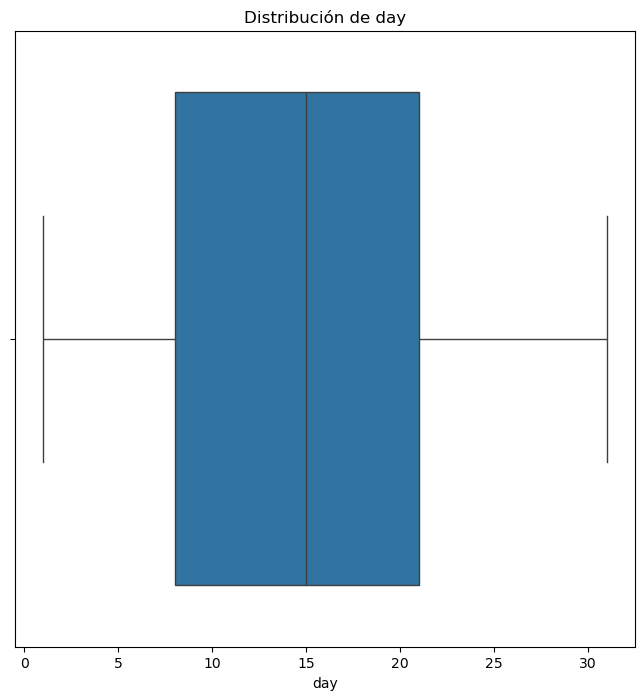

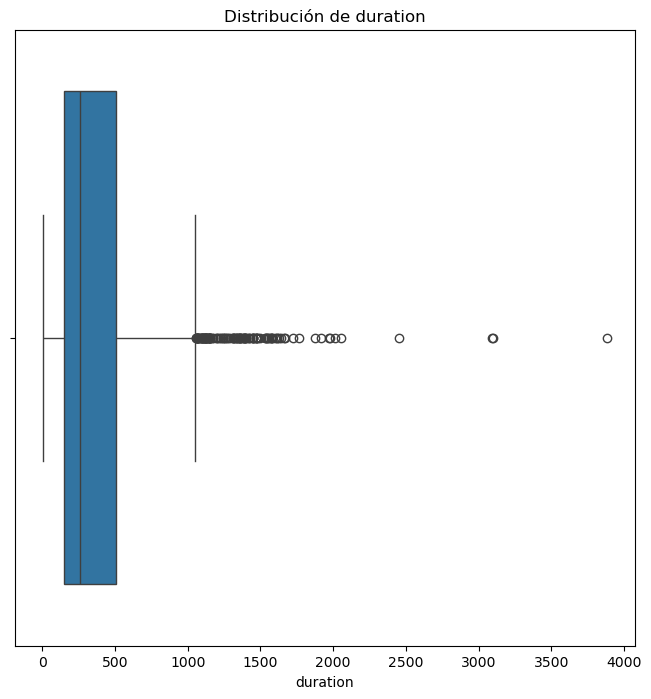

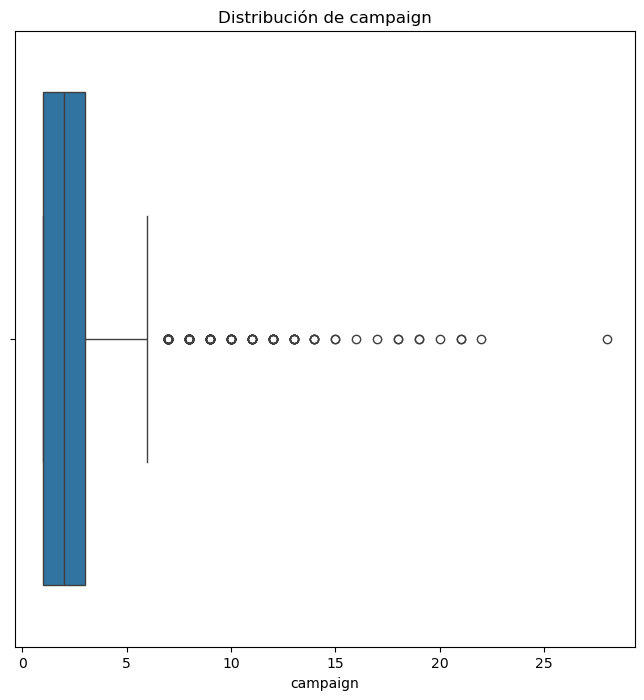

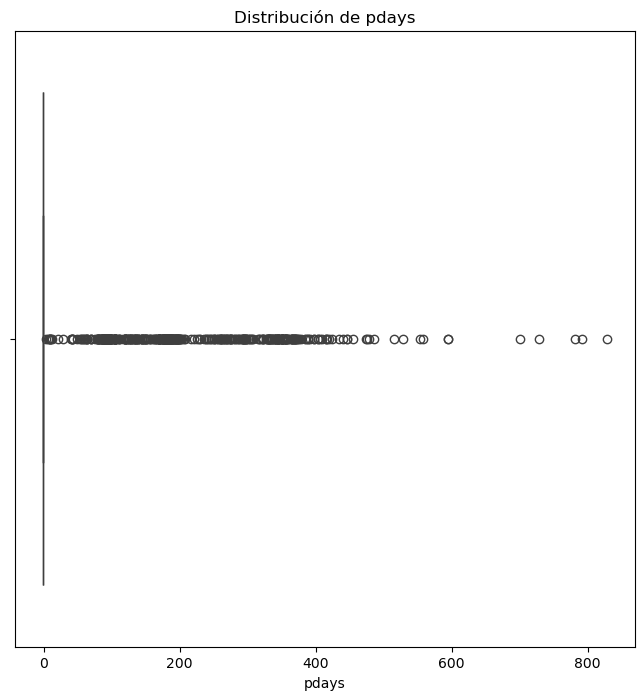

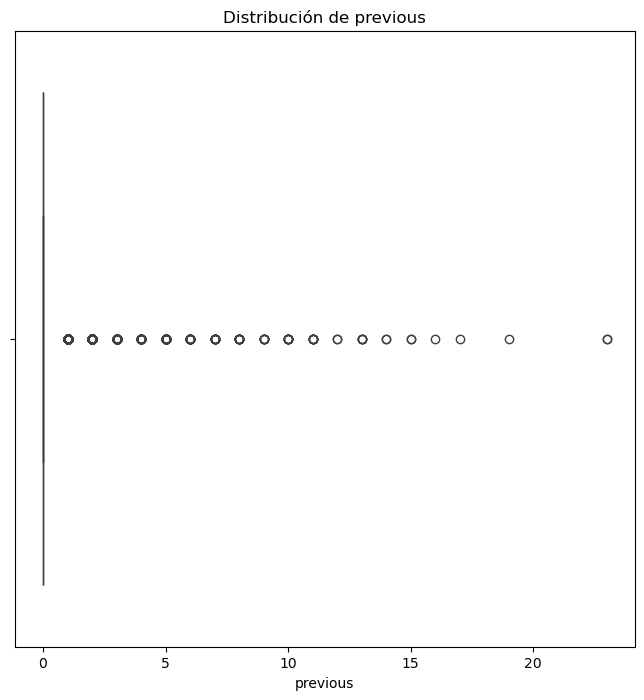

In [21]:
numerical_columns =test_set.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 8))
    sns.boxplot(data=test_set, x=col)
    plt.title(f'Distribución de {col}')
    plt.show()

### Tratamiento de Outliers

#### Análisis de Resultado: en la variable *Age* se observan algunos valores atípicos, estos son menos extremos en comparación con otras variables. La edad se concentra entre los 30 y 50 años y a partir de los 70 hay algunos datos pero no son significativos, lo que determina que “age” tiene pocos outliers, por lo podría ser apropiado mantener los valores.
#### La variable *balance* tienen una significativa cantidad de outliers, esto podría ser relevante porque un balance muy alto podría influir en la desción del cliente, por loq ue se tratarán los ouliers de esta variable con winsorización

In [24]:
from scipy.stats.mstats import mquantiles

lower_limit, upper_limit = mquantiles(train_set['balance'], prob=[0.01, 0.99])

train_set['balance'] = train_set['balance'].clip(lower=lower_limit, upper=upper_limit)
test_set['balance'] = test_set['balance'].clip(lower=lower_limit, upper=upper_limit)



### Verificamos que no existen valores nulos, si lo hubiese se tendría que imputar los valores faltantes. Como previamente se realizó la deteccion y tratamientos de Ouliers, esta todo correcto.

In [26]:
print("Valores nulos por columna:")
print(train_set[['age', 'balance', 'housing', 'loan', 'poutcome','education']].isnull().sum())


Valores nulos por columna:
age          7
balance      0
housing      0
loan         0
poutcome     0
education    6
dtype: int64


In [27]:
print("Valores nulos por columna:")
print(test_set[['age', 'balance', 'housing', 'loan', 'poutcome','education']].isnull().sum())


Valores nulos por columna:
age          3
balance      0
housing      0
loan         0
poutcome     0
education    1
dtype: int64


In [28]:
print("\nValores faltantes en y_train:", y_train.isnull().sum())
print("Valores faltantes en y_test:", y_test.isnull().sum())



Valores faltantes en y_train: 0
Valores faltantes en y_test: 0


# Imputación de valores faltantes

### Contar Valores nulos por columnas en ambos conjuntos

In [31]:
print("Valores faltantes en el conjunto de entrenamiento:")
train_set.isnull().sum()

Valores faltantes en el conjunto de entrenamiento:


age          7
job          0
marital      4
education    6
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [32]:
print("Valores faltantes en el conjunto de prueba:")
test_set.isnull().sum()

Valores faltantes en el conjunto de prueba:


age          3
job          0
marital      1
education    1
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

#### Imputacion de valores faltantes, media para la 'age' ya que los valores extremos no son muy considerables, moda para 'education' ya que es una variable categorica, dejamos igual el valor en 'marital' ya que será una valor que no usaremos y a futuro desistimaremos de nuestro DataFrame.
Esta imputación se realizará en ambos conjuntos

### Gestión de Valores Faltantes

In [35]:
print("Columnas en train_set:")
print(train_set.columns)

print("\nColumnas en test_set:")
print(test_set.columns)


Columnas en train_set:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

Columnas en test_set:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


In [36]:
education_mode = train_set['education'].mode()[0]
train_set['education'] = train_set['education'].fillna(education_mode)
test_set['education'] = test_set['education'].fillna(education_mode)

age_median = train_set['age'].median()
train_set['age'] = train_set['age'].fillna(age_median)
test_set['age'] = test_set['age'].fillna(age_median)


In [37]:
print("Valores faltantes en 'education' después de la imputación:")
print(train_set['education'].isnull().sum())
print(test_set['education'].isnull().sum())

print("\nValores faltantes en 'age' después de la imputación:")
print(train_set['age'].isnull().sum())
print(test_set['age'].isnull().sum())


Valores faltantes en 'education' después de la imputación:
0
0

Valores faltantes en 'age' después de la imputación:
0
0


##### Se verifica que no hay valores faltantes en las características imputadas

# Codificación de variables categóricas

#### En este paso, convertiré las variables categóricas en un formato numérico para que puedan ser utilizadas por los algoritmos de machine learning:

One-Hot Encoding: Para variables categóricas sin orden inherente.

Label Encoding: Para variables categóricas con un orden lógico.

#### Se Identifican las variables categóricas y según su caracteristica se trabajara la codificación.
#### Se aplica Label Encoding en 'housing', 'loan', por ser variables binarias, en cuanto a 'poutcome' y 'education', estas dos ultimas variables por no tener un orden implícito. al ser binarias, lo caul es más simple y eficiente, en cuanto a 'poutcome'  no es binario, sino una categoría multiple, pero podría tener un orden implícito por eso es más recomendable aplicar la misma codificacion de etiqueta y en 'education' One-Hot Encoding


In [42]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
for col in ['housing', 'loan', 'poutcome', 'education']:
    le = LabelEncoder()
    train_set[col] = le.fit_transform(train_set[col])
    test_set[col] = le.transform(test_set[col]) 
    
print("Label Encoding aplicado a 'housing', 'loan', 'education' y 'poutcome'.")


Label Encoding aplicado a 'housing', 'loan', 'education' y 'poutcome'.


In [45]:
print(train_set.head())  

       age          job  marital  education default  balance  housing  loan  \
8644  46.0       admin.  married          1      no    526.0        0     1   
2632  46.0       admin.  married          2      no   2552.0        0     0   
3056  25.0   technician   single          1      no    139.0        0     1   
1080  43.0   technician  married          1      no   3288.0        1     0   
4006  37.0  blue-collar   single          3      no    217.0        0     0   

       contact  day month  duration  campaign  pdays  previous  poutcome  
8644  cellular   31   jul       251         3     -1         0         3  
2632  cellular    3   sep       260         1     94         8         2  
3056  cellular   11   jan       202         1     91         1         2  
1080  cellular   21   nov       775         3     -1         0         3  
4006  cellular   23   sep       272         2     -1         0         3  


In [46]:
print(test_set.head())   

       age          job  marital  education default  balance  housing  loan  \
8220  32.0   management  married          2      no    393.0        0     0   
2521  36.0   technician   single          1      no    376.0        0     0   
7949  52.0       admin.  married          1      no    722.0        0     0   
7879  35.0   management   single          1     yes   -202.0        1     0   
616   41.0  blue-collar  married          1      no   -190.0        0     1   

       contact  day month  duration  campaign  pdays  previous  poutcome  
8220  cellular   28   jan       458         2     -1         0         3  
2521  cellular   13   aug       479         1     -1         0         3  
7949  cellular   26   oct        99         2    185         3         0  
7879   unknown   20   may       268         3     -1         0         3  
616   cellular   29   jul       808         3     -1         0         3  


### Se eliminan las variables que no usaremos para evitar el ruido en el anáilisis y en el entrenamiento, ya que nuestro proyecto no considera estas variables deterinantes para el objetivo, esto se elimina en ambos conjuntos.

In [48]:

train_set = train_set.drop(columns=['marital', 'job', 'month','duration'])
test_set = test_set.drop(columns=['marital', 'job', 'month','duration'])



#### En cuanto a la característica 'deposit' al ser una variable objetivo se procede a convertirlo en información binaria, debido a su sencilles a la hora de su interprestación en ela predicción.

In [50]:
print(train_set.columns)
print(test_set.columns)


Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')
Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')


#### Se procede a realizar a la variable 'deposit' una codificación binaria, pero como la columna deposit se separó de los conjuntos de datos de entrenamiento y de prueba se aplica a las variables objetivos en la dataset con estratificación

In [52]:
y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})


In [53]:
print(y_train.head())
print(y_test.head())


8644    0
2632    1
3056    1
1080    1
4006    1
Name: deposit, dtype: int64
8220    0
2521    1
7949    0
7879    0
616     1
Name: deposit, dtype: int64


# Estandarización

#### La estandarización asegura que todas las características numéricas tengan una media de 0 y una desviación estándar de 1. Esto es importante porque muchos algoritmos (por ejemplo, regresión logística, SVM, k-means) son sensibles a la escala de las características.

##### Se Identifica  las columnas numéricas para trabajar directamente con ellas, así aseguramos que estamos tomando todas las caracteristicas de nuesto DataFrame, de ambos conjuntos

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
num_columns = ['age', 'balance', 'campaign', 'pdays', 'previous']

scaler = StandardScaler()

train_set[num_columns] = scaler.fit_transform(train_set[num_columns])
test_set[num_columns] = scaler.transform(test_set[num_columns])


In [59]:
print("Media después de la estandarización (train_set):")
print(train_set[num_columns].mean())

print("\nDesviación estándar después de la estandarización (train_set):")
print(train_set[num_columns].std())


Media después de la estandarización (train_set):
age         2.319669e-16
balance    -2.964242e-17
campaign   -7.321081e-17
pdays      -4.456310e-17
previous   -4.376733e-18
dtype: float64

Desviación estándar después de la estandarización (train_set):
age         1.000056
balance     1.000056
campaign    1.000056
pdays       1.000056
previous    1.000056
dtype: float64


#### Según este resultado las medias de las columnas son cercacnas al 0 y la desviación estándar cercana a 1

# Generación de Nuevas Características

##### Con la idea de mejorar el desempeño del modelo se determina generar nuevas características, ya que estas variables tienen impacto en el resultado objetivo 'deposit', así podremos simplificar el modelo y evitar sobreajuste.

##### tomo la cataegoria 'balance' y  'age' porque puede capturar relaciones relevantes entre la edad del cliente y su nivel financiero, esto ayudará a que el modelo interprete más facilmente diferencias cualitativas

In [64]:
print("Columnas en train_set:")
print(train_set.columns)

print("\nColumnas en test_set:")
print(test_set.columns)


Columnas en train_set:
Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')

Columnas en test_set:
Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')


In [65]:
train_set['balance_to_age_ratio'] = train_set['balance'] / train_set['age']
test_set['balance_to_age_ratio'] = test_set['balance'] / test_set['age']


In [66]:
print(train_set[['balance_to_age_ratio']].head())
print(test_set[['balance_to_age_ratio']].head())

      balance_to_age_ratio
8644             -0.941515
2632              1.239207
3056              0.412277
1080              5.255081
4006              1.516234
      balance_to_age_ratio
8220              0.582308
2521              1.055682
7949             -0.328059
7879              1.380892
616              76.448262


##### Categorizar 'balance' en rangos, esto solo se aplica

In [68]:
bins = [-float('inf'), 0, 1000, 5000, float('inf')]
labels = ['deuda', 'bajo', 'medio', 'alto']

train_set['balance_category'] = pd.cut(train_set['balance'], bins=bins, labels=labels)
test_set['balance_category'] = pd.cut(test_set['balance'], bins=bins, labels=labels)


##### Crear una nueva columna: ratio entre 'balance' y 'age'

###### Se aplica +1 para evitar divisiones por cero

In [71]:
train_set['balance_age_ratio'] = train_set['balance'] / (train_set['age'] + 1)  
test_set['balance_age_ratio'] = test_set['balance'] / (test_set['age'] + 1)


In [72]:
print(train_set[['age', 'balance', 'balance_category', 'balance_age_ratio']].head())
print(test_set[['age', 'balance', 'balance_category', 'balance_age_ratio']].head())


           age   balance balance_category  balance_age_ratio
8644  0.411944 -0.387852            deuda          -0.274693
2632  0.411944  0.510484             bajo           0.361547
3056 -1.356972 -0.559449            deuda           1.567206
1080  0.159242  0.836830             bajo           0.721877
4006 -0.346163 -0.524864            deuda          -0.802744
           age   balance balance_category  balance_age_ratio
8220 -0.767333 -0.446825            deuda          -1.920450
2521 -0.430397 -0.454362            deuda          -0.797682
7949  0.917349 -0.300945            deuda          -0.156959
7879 -0.514631 -0.710650            deuda          -1.464144
616  -0.009226 -0.705329            deuda          -0.711897


In [73]:
encoder = LabelEncoder()

train_set['balance_category'] = encoder.fit_transform(train_set['balance_category'])
test_set['balance_category'] = encoder.transform(test_set['balance_category'])


In [74]:
print("Categorías en train_set (balance_category):")
print(train_set['balance_category'].unique())

print("\nCategorías en test_set (balance_category):")
print(test_set['balance_category'].unique())


Categorías en train_set (balance_category):
[1 0]

Categorías en test_set (balance_category):
[1 0]


In [75]:
print(train_set.dtypes)


age                     float64
education                 int32
default                  object
balance                 float64
housing                   int32
loan                      int32
contact                  object
day                       int64
campaign                float64
pdays                   float64
previous                float64
poutcome                  int32
balance_to_age_ratio    float64
balance_category          int32
balance_age_ratio       float64
dtype: object


In [76]:
print(train_set[['age', 'balance', 'balance_category', 'balance_age_ratio']].head())
print(test_set[['age', 'balance', 'balance_category', 'balance_age_ratio']].head())

           age   balance  balance_category  balance_age_ratio
8644  0.411944 -0.387852                 1          -0.274693
2632  0.411944  0.510484                 0           0.361547
3056 -1.356972 -0.559449                 1           1.567206
1080  0.159242  0.836830                 0           0.721877
4006 -0.346163 -0.524864                 1          -0.802744
           age   balance  balance_category  balance_age_ratio
8220 -0.767333 -0.446825                 1          -1.920450
2521 -0.430397 -0.454362                 1          -0.797682
7949  0.917349 -0.300945                 1          -0.156959
7879 -0.514631 -0.710650                 1          -1.464144
616  -0.009226 -0.705329                 1          -0.711897


### PCA

##### Debido a la baja dimensionalidad y inexistencia de multicolinealidad no se procede a realiazar PCA, esto evitará una complejidad innecesaria

# VERIFICACION EN PIPELINE

#### Para asegurarnos que todas las transformaciones y pasos de preprocesamiento funcionan correctamente y están alineados entre el conjunto de entrenamiento y el conjunto de prueba. Esto garantiza que los datos estén listos para entrenar el modelo y que no haya errores o inconsistencias.



In [81]:
print("Columnas en train_set:", train_set.columns)
print("Columnas en test_set:", test_set.columns)

print("\n¿Las columnas son consistentes?:", set(train_set.columns) == set(test_set.columns))


Columnas en train_set: Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'campaign', 'pdays', 'previous', 'poutcome',
       'balance_to_age_ratio', 'balance_category', 'balance_age_ratio'],
      dtype='object')
Columnas en test_set: Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'campaign', 'pdays', 'previous', 'poutcome',
       'balance_to_age_ratio', 'balance_category', 'balance_age_ratio'],
      dtype='object')

¿Las columnas son consistentes?: True


##### se comprueban que todas las columnas estan iguales en ambos modelos excepto la variable objetivo 

In [83]:
print("Valores faltantes en train_set:")
print(train_set.isnull().sum())

print("\nValores faltantes en test_set:")
print(test_set.isnull().sum())


Valores faltantes en train_set:
age                     0
education               0
default                 0
balance                 0
housing                 0
loan                    0
contact                 0
day                     0
campaign                0
pdays                   0
previous                0
poutcome                0
balance_to_age_ratio    0
balance_category        0
balance_age_ratio       0
dtype: int64

Valores faltantes en test_set:
age                     0
education               0
default                 0
balance                 0
housing                 0
loan                    0
contact                 0
day                     0
campaign                0
pdays                   0
previous                0
poutcome                0
balance_to_age_ratio    0
balance_category        0
balance_age_ratio       0
dtype: int64


### Descripción estadística de las columnas numéricas
###### Comparamos para asegurarnos que las transformaciones son consistentes 

In [85]:
print("Estadísticas en train_set:")
print(train_set.describe().T)

print("\nEstadísticas en test_set:")
print(test_set.describe().T)


Estadísticas en train_set:
                       count          mean        std         min       25%  \
age                   8929.0  2.319669e-16   1.000056   -1.946611 -0.767333   
education             8929.0  1.288834e+00   0.752988    0.000000  1.000000   
balance               8929.0 -2.964242e-17   1.000056   -0.854279 -0.566987   
housing               8929.0  4.736253e-01   0.499332    0.000000  0.000000   
loan                  8929.0  1.294658e-01   0.335734    0.000000  0.000000   
day                   8929.0  1.568350e+01   8.429058    1.000000  8.000000   
campaign              8929.0 -7.321081e-17   1.000056   -0.540031 -0.540031   
pdays                 8929.0 -4.456310e-17   1.000056   -0.484037 -0.484037   
previous              8929.0 -4.376733e-18   1.000056   -0.355931 -0.355931   
poutcome              8929.0  2.473513e+00   1.006252    0.000000  2.000000   
balance_to_age_ratio  8929.0  1.528646e-01  17.583684 -550.578443 -0.533484   
balance_category      892

##### nuestos valores están dentro del rango 0 y 1 lo cual confirma que tenemos una estadistica consistente

# ENTRENAMIENTO DEL MODELO NO SUPERVISADO

##### Implementacion de K-Means, para identificar grupos de clientes para personalizar las recomendaciones. La métrica será la de indice de silueta

In [89]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

columns_for_clustering = ['age', 'balance', 'campaign', 'pdays', 'previous']
X_clustering = train_set[columns_for_clustering]


#### Probar que K da el mejor resultado

In [91]:

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_clustering)
    silhouette_avg = silhouette_score(X_clustering, clusters)
    print(f"Índice de Silueta para k={k}: {silhouette_avg:.2f}")


Índice de Silueta para k=2: 0.39
Índice de Silueta para k=3: 0.40
Índice de Silueta para k=4: 0.39
Índice de Silueta para k=5: 0.32


### Interpretación
##### el indice de silueta con el mejor número de clusters es K=3: 0.40 lo que indica que dividir a los clientes en 3 grupos da un resultado mejor, es decir los clientes dentro de cada grupo son más parecidos entre sí y los grupos están más separados. Estas agrupaciones podráin ser Clientes con poco interés o adquisición baja, Cliente con un interés mediano y con un nivel económico más elevado y por último clientes altamente interesados o capacidad económica alta.
### Relacion con el Proyecto:
##### Personalizar las recomendaciones enfocadas a cada tipo de cliente.

In [93]:

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_clustering)



## Asignar cluster al conjunto de datos

In [95]:
train_set['cluster'] = clusters

print(train_set[['age', 'balance', 'campaign', 'pdays', 'previous', 'cluster']].head())


           age   balance  campaign     pdays  previous  cluster
8644  0.411944 -0.387852  0.178481 -0.484037 -0.355931        0
2632  0.411944  0.510484 -0.540031  0.386954  3.075684        2
3056 -1.356972 -0.559449 -0.540031  0.359449  0.073021        0
1080  0.159242  0.836830  0.178481 -0.484037 -0.355931        0
4006 -0.346163 -0.524864 -0.180775 -0.484037 -0.355931        0


### Calculamos las estadisticas promedio para cada cluster

In [97]:
numeric_columns = train_set.select_dtypes(include=['number']).columns
cluster_summary = train_set[numeric_columns].groupby('cluster').mean()

print(cluster_summary)


              age  education   balance   housing      loan        day  \
cluster                                                                 
0       -0.054782   1.266998 -0.274165  0.475163  0.143123  15.996895   
1        0.395098   1.386667  2.675608  0.388000  0.058667  16.453333   
2        0.032576   1.327576 -0.138479  0.504893  0.109384  14.188831   

         campaign     pdays  previous  poutcome  balance_to_age_ratio  \
cluster                                                                 
0        0.063544 -0.439212 -0.318442  2.900497              0.906591   
1       -0.056712 -0.121338 -0.089409  2.512000             -6.881311   
2       -0.211178  1.681293  1.219609  0.873345              0.394735   

         balance_category  balance_age_ratio  
cluster                                       
0                0.796492           0.092180  
1                0.000000           1.646385  
2                0.703512           0.139395  


In [98]:
cluster_distribution = train_set['cluster'].value_counts(normalize=True) * 100
print("\nDistribución de clientes por cluster (%):")
print(cluster_distribution)



Distribución de clientes por cluster (%):
cluster
0    72.146937
2    19.453466
1     8.399597
Name: proportion, dtype: float64


In [99]:
print("Características promedio por cluster:")
print(cluster_summary)


Características promedio por cluster:
              age  education   balance   housing      loan        day  \
cluster                                                                 
0       -0.054782   1.266998 -0.274165  0.475163  0.143123  15.996895   
1        0.395098   1.386667  2.675608  0.388000  0.058667  16.453333   
2        0.032576   1.327576 -0.138479  0.504893  0.109384  14.188831   

         campaign     pdays  previous  poutcome  balance_to_age_ratio  \
cluster                                                                 
0        0.063544 -0.439212 -0.318442  2.900497              0.906591   
1       -0.056712 -0.121338 -0.089409  2.512000             -6.881311   
2       -0.211178  1.681293  1.219609  0.873345              0.394735   

         balance_category  balance_age_ratio  
cluster                                       
0                0.796492           0.092180  
1                0.000000           1.646385  
2                0.703512           0.1393

In [100]:
# Usar el modelo K-Means para predecir clusters en test_set
test_set['cluster'] = kmeans.predict(test_set[['age', 'balance', 'campaign', 'pdays', 'previous']])


### Interpretación y Relacion con el proyecto
#### Podemos observar que los tres grupos están claramente separados:
##### - Cluster 0: grupo más grande con un 72% con un perfil de edad más joven y un balance bajo. Grupo al que habría que elaborar estratégia de camapaña para fomentar interés para convertir un porcentakje de este grupo.
##### - Cluster 1: Grupo más pequeño de los tres con un 8,4 % con perfil de edad más mayores y su balance alto, lo cual nos llevaría a pensar en campañas enfocadas a productos específicos financieros avanzados.
##### - Cluster 2: se ubicaría en ser el grupo intermedio por su 19,4% rnago de edad media y en su balance, pero se observa que es el grupo que tiene receptivo y activo, lo que nos da señal a aprovechar esta interacción y cerrar ventas rápidas con estos clintes.

# ENTRENAMIENTO DEL MODELO  SUPERVISADO

##### Implementacion Regresión Logística, para predecir la probabilidad de aceptación. Las métricas serán, Accuracy, Precisión, Recall, F1-Score.

In [104]:
# Mostrar las columnas disponibles en train_set y test_set
print("Columnas en train_set:", train_set.columns)
print("\nColumnas en test_set:", test_set.columns)


Columnas en train_set: Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'campaign', 'pdays', 'previous', 'poutcome',
       'balance_to_age_ratio', 'balance_category', 'balance_age_ratio',
       'cluster'],
      dtype='object')

Columnas en test_set: Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'campaign', 'pdays', 'previous', 'poutcome',
       'balance_to_age_ratio', 'balance_category', 'balance_age_ratio',
       'cluster'],
      dtype='object')


In [105]:
predictor_columns = ['age', 'balance', 'campaign', 'pdays', 'previous', 'balance_to_age_ratio', 'balance_category', 'cluster']

train_set_updated = train_set[predictor_columns]
test_set_updated = test_set[predictor_columns]


In [106]:
# entrenar el modelo con datos actualizados
from sklearn.linear_model import LogisticRegression

# Inicializar el modelo
log_reg = LogisticRegression(random_state=42, max_iter=500)

# Entrenar el modelo con train_set_updated
log_reg.fit(train_set_updated, y_train)


LogisticRegression(max_iter=500, random_state=42)

In [107]:
# Predicciones
y_pred = log_reg.predict(test_set_updated)


In [108]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Exactitud (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nExactitud (Accuracy): {accuracy:.2f}")


Matriz de Confusión:
[[840 335]
 [565 493]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.60      0.71      0.65      1175
           1       0.60      0.47      0.52      1058

    accuracy                           0.60      2233
   macro avg       0.60      0.59      0.59      2233
weighted avg       0.60      0.60      0.59      2233


Exactitud (Accuracy): 0.60


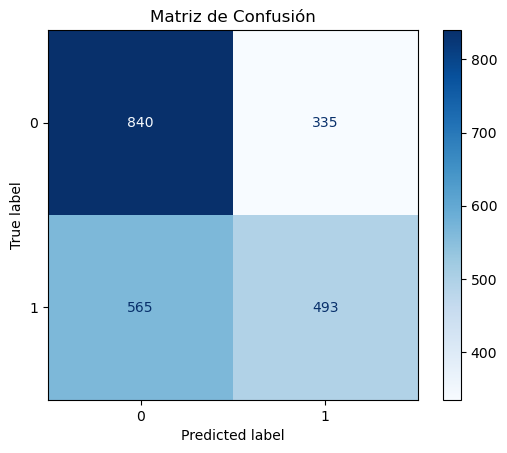

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay

# Crear la matriz de confusión visual
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()


#### Interpretacion
- **840 (True Negatives - TN):** Clientes que realmente rechazaron la oferta y el modelo predijo correctamente como `0`.
- **335 (False Positives - FP):** Clientes que realmente rechazaron la oferta, pero el modelo predijo incorrectamente como `1`.
- **493 (True Positives - TP):** Clientes que realmente aceptaron la oferta y el modelo predijo correctamente como `1`.
- **565 (False Negatives - FN):** Clientes que realmente aceptaron la oferta, pero el modelo predijo incorrectamente como `0`.

#### Relación con las métricas:
- **Precisión clase `1` (Clientes interesados):** Mide cuántos de los `493 + 335` predichos como interesados (`1`) son correctos. Esto ayuda a evitar esfuerzos en clientes que no están interesados.
- **Recall clase `1`:** Mide cuántos de los `493 + 565` clientes realmente interesados son detectados. Esto es importante para captar más clientes interesados.
- **Exactitud (Accuracy):** Representa la proporción total de predicciones correctas en la matriz (TN + TP) frente al total de clientes.


In [182]:
from sklearn.metrics import roc_curve, roc_auc_score


#### Calcular la curva ROC y Calcular el AUC

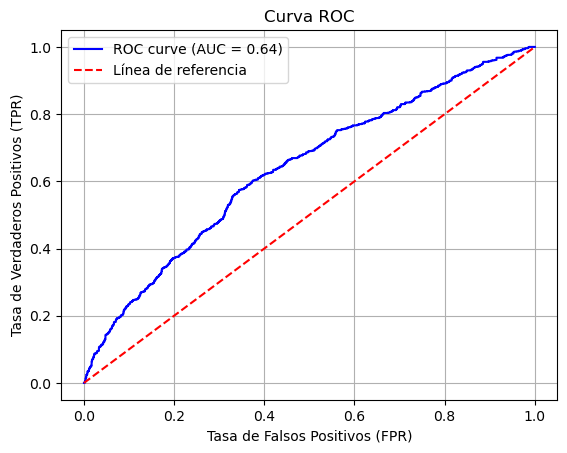

In [176]:
y_pred_prob = log_reg.predict_proba(test_set_updated)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Línea de referencia')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()



### Interpretación de la Curva ROC:

#### 1. **Ejes del gráfico:**
- **Eje X (Tasa de Falsos Positivos - FPR):** Representa la proporción de ejemplos negativos (clase `0`) que se clasifican erróneamente como positivos (`1`).
- **Eje Y (Tasa de Verdaderos Positivos - TPR):** Representa la proporción de ejemplos positivos (clase `1`) que se clasifican correctamente.

#### 2. **AUC (Área Bajo la Curva):**
- **AUC = 0.64:** Esto indica que el modelo tiene una capacidad moderada para separar las clases `0` y `1`.
  - Un AUC de **0.5** significa que el modelo no tiene capacidad discriminativa (equivale a un modelo aleatorio).
  - Un AUC de **1.0** representa un modelo perfecto.

En este caso, con un AUC de **0.64**, el modelo está por encima de un comportamiento aleatorio, pero aún tiene espacio para mejoras.

#### 3. **Curva Azul (ROC curve):**
- La curva muestra cómo el modelo balancea el **recall** y la **tasa de falsos positivos (FPR)** a medida que cambia el umbral de decisión.
- Si la curva está más cerca del eje superior izquierdo, el modelo es mejor. Aquí, la curva se desvía hacia el centro, lo que indica un rendimiento moderado.

### Relación con los objetivos del proyecto:
- **Fortalezas:** El modelo tiene cierto poder predictivo para separar los clientes interesados (`1`) de los no interesados (`0`), útil para campañas de marketing dirigidas.
- **Debilidades:** El AUC indica que el modelo aún tiene espacio para mejorar en la discriminación de las clases.


### Obtener los coeficientes del modelo y gráfica de la importacia de las categorías


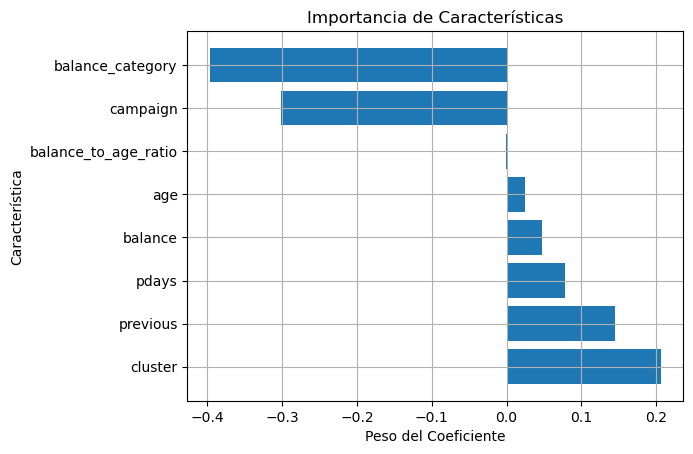

In [179]:
feature_importance = pd.DataFrame({'Característica': predictor_columns, 'Importancia': log_reg.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importancia', ascending=False)

# Graficar la importancia
plt.barh(feature_importance['Característica'], feature_importance['Importancia'])
plt.title('Importancia de Características')
plt.xlabel('Peso del Coeficiente')
plt.ylabel('Característica')
plt.grid(True)
plt.show()


### Interpretación del gráfico:

1. **Eje vertical (Características):** 
   - Las variables predictoras utilizadas en el modelo, como `balance_category`, `campaign`, `cluster`, etc.

2. **Eje horizontal (Peso del Coeficiente):**
   - Representa el impacto (positivo o negativo) de cada característica en la probabilidad de que un cliente acepte la oferta (clase `1`).
   - **Pesos positivos:** Incrementan la probabilidad de que el cliente acepte.
   - **Pesos negativos:** Disminuyen la probabilidad.

### Observaciones clave:

1. **`balance_category`:** 
   - Tiene el mayor impacto negativo. Esto significa que ciertas categorías de `balance_category` están asociadas con una menor probabilidad de aceptación. Podría tratarse de clientes con balances bajos o en deuda.

2. **`campaign`:**
   - Tiene un impacto negativo significativo, indicando que campañas con muchas interacciones (muchos contactos previos) disminuyen la probabilidad de aceptación. Esto podría ser debido al agotamiento del cliente por demasiados intentos.

3. **`cluster`:**
   - Tiene un peso positivo alto, lo que indica que ciertos grupos de clientes (definidos por el clustering) están fuertemente asociados con una mayor probabilidad de aceptar la oferta.

4. **`previous`:**
   - También contribuye positivamente. Esto tiene sentido, ya que clientes que interactuaron previamente con éxito tienen más probabilidades de aceptar.

5. **Otras características (`age`, `balance`, `pdays`, `balance_to_age_ratio`):**
   - Tienen menor impacto, pero aún son relevantes para las predicciones.


### Relación con los objetivos del negocio:
1. **Clientes con balances bajos o en deuda (`balance_category`) pueden necesitar estrategias diferentes:**
   - Ofertas personalizadas que sean más atractivas para este grupo.
   - Reducción de contactos en campañas para evitar saturar a clientes poco interesados.

2. **Uso de clusters (`cluster`):**
   - Refuerza la importancia del clustering como parte del modelo.
   - Podría permitir segmentar clientes de alto interés para campañas dirigidas.

3. **Clientes con interacciones previas exitosas (`previous`):**
   - Son un grupo prioritario para campañas futuras, ya que tienen más probabilidad de aceptar.


## Resultados del modelo:
##### Matriz de Confusión:
[840 335]: 840 predicciones correctas para la clase 0 (rechazaron el producto), 335 incorrectas (falsos positivos).
[565 493]: 493 predicciones correctas para la clase 1 (aceptaron el producto), 565 incorrectas (falsos negativos).

Precisión:
Clase 0: 0.60 → El 60% de las predicciones positivas para esta clase fueron correctas.
Clase 1: 0.60 → Igual para la clase positiva.

Recall (Sensibilidad):
Clase 0: 0.71 → El modelo identificó correctamente el 71% de los casos reales de la clase 0.
Clase 1: 0.47 → El modelo identifica correctamente el 47% de los clientes interesados (menos falsos negativos)

F1-Score:
Clase 0: 0.65 → Balance aceptable entre precisión y recall para esta clase.
Clase 1: 0.56 → El modelo necesita mejorar en esta clase.

Accuracy (Exactitud): 0.60 → El 60% de las predicciones totales fueron correctas.

### Interpretación:

El modelo tiene un rendimiento razonable al identificar a los clientes que rechazarán la oferta (clase 0), con un recall de 52%.
Este rendimiento puede ser útil para evitar gastar recursos en clientes con alta probabilidad de rechazo.

#### Áreas de mejora:

El modelo es menos efectivo para identificar a los clientes que aceptarán la oferta (clase 1), con un recall de 47%. Esto significa que muchos clientes interesados no están siendo detectados (falsos negativos).
F1-Score para la clase 1 también indica que hay espacio para mejorar el balance entre precisión y recall.

#### Decisiones estratégicas:
Se puede buscar estrategías para fortalecer el modelo.Como se ve en el gráfico de AUC y curva ROC, se podría ajustar el hiperparámetro en la Regresiñon Logistia o explorara optimizar categoría 'balance_category'